# `pyEQL` Tutorial: Searching the Property Database

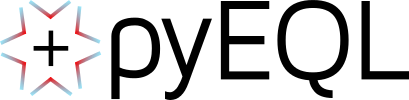

`pyEQL` is an open-source `python` library for solution chemistry calculations and ion properties developed by the [Kingsbury Lab](https://www.kingsburylab.org/) at Princeton University.

[Documentation](https://pyeql.readthedocs.io/en/latest/) | [How to Install](https://pyeql.readthedocs.io/en/latest/installation.html) | [GitHub](https://github.com/rkingsbury/pyEQL) 

## Installation

Uncomment and run the code cell below, if you do not already have `pyEQL`

In [1]:
# pip install pyEQL

## First, import the property database

`pyEQL`'s built-in property database contains physichochemical, transport, and model parameters for hundreds of solutes. This information is used behind the scenes when you interact with a `Solution` object, but it can also be accessed directly.

In [2]:
from pyEQL import IonDB

## How to Search the Database

### Query an example document

You can think of the database like `list` of `dict` that contain structure data. More specifically, the database is a list of [`Solute` objects](https://pyeql.readthedocs.io/en/latest/database.html#the-solute-class) that have been serialized to dictionaries. We refer to each of these `dict` as **"documents"** (consistent with MongoDB terminology) or "records"

To see what one document looks like, use `query_one()`, which retrieves a single record from the database. The record is a `dict`.

In [3]:
IonDB.query_one()

{'_id': ObjectId('65f70cc603066ca9747ebf2c'),
 'formula': 'Ac[+3]',
 'charge': 3,
 'molecular_weight': '227.0 g/mol',
 'elements': ['Ac'],
 'chemsys': 'Ac',
 'pmg_ion': {'Ac': 1,
  'charge': 3,
  '@module': 'pymatgen.core.ion',
  '@class': 'Ion',
  '@version': None},
 'formula_html': 'Ac<sup>+3</sup>',
 'formula_latex': 'Ac$^{+3}$',
 'formula_hill': 'Ac',
 'formula_pretty': 'Ac^+3',
 'oxi_state_guesses': {'Ac': 3},
 'n_atoms': 1,
 'n_elements': 1,
 'size': {'radius_ionic': {'value': '1.26 Å',
   'reference': 'pymatgen',
   'data_type': 'experimental'},
  'radius_hydrated': None,
  'radius_vdw': {'value': '2.47 Å',
   'reference': 'pymatgen',
   'data_type': 'experimental'},
  'molar_volume': None,
  'radius_ionic_marcus': {'value': '1.18 ± 0.02 Å',
   'reference': 'Marcus2015',
   'data_type': 'experimental'}},
 'thermo': {'ΔG_hydration': {'value': '-3086.0 ± 10 kJ/mol',
   'reference': '10.1021/acs.jpca.9b05140',
   'data_type': 'experimental'},
  'ΔG_formation': None},
 'transport': 

### Query a specific document

The `IonDB` is a [`maggma.Store`](https://materialsproject.github.io/maggma/getting_started/stores/) that can be queried using a MongoDB-like syntax. The basic syntax is

```
IonDB.query_one({field: value})
```

where `field` is a top-level key in the `Solute` `dict`, such as `formula`, `charge`, or `elements`. See [this page](https://riptutorial.com/mongodb/example/26813/pymongo-queries) and the `maggma` documentation (link WIP) for more detailed examples.

In [4]:
# a document with the formula "Na[+1]"
IonDB.query_one({"formula":'Na[+1]'})

{'_id': ObjectId('65f70cc603066ca9747ec00c'),
 'formula': 'Na[+1]',
 'charge': 1,
 'molecular_weight': '22.98976928 g/mol',
 'elements': ['Na'],
 'chemsys': 'Na',
 'pmg_ion': {'Na': 1,
  'charge': 1,
  '@module': 'pymatgen.core.ion',
  '@class': 'Ion',
  '@version': None},
 'formula_html': 'Na<sup>+1</sup>',
 'formula_latex': 'Na$^{+1}$',
 'formula_hill': 'Na',
 'formula_pretty': 'Na^+1',
 'oxi_state_guesses': {'Na': 1},
 'n_atoms': 1,
 'n_elements': 1,
 'size': {'radius_ionic': {'value': '1.16 Å',
   'reference': 'pymatgen',
   'data_type': 'experimental'},
  'radius_hydrated': {'value': '3.58 Å',
   'reference': 'Nightingale1959',
   'data_type': 'experimental'},
  'radius_vdw': {'value': '2.27 Å',
   'reference': 'pymatgen',
   'data_type': 'experimental'},
  'molar_volume': {'value': '-5.0 cm**3/mol',
   'reference': 'Calculation of the Partial Molal Volume of Organic Compounds and Polymers. Progress in Colloid & Polymer Science (94), 20-39.',
   'data_type': 'experimental'},
  'ra

### Only return a subset of the document

If you don't need to see the entire document, you can restrict the data returned by the query (in MongoDB, this is called "projection"). To use this feature, pass a second argument that is a `list` containing _only the fields that you want returned_. Note that there is a unique identified (field name `_id`) that is always returned.

In [5]:
# a document with the formula "Na[+1]", where we only want the formula, charge, and molecular_weight
IonDB.query_one({"formula":'Na[+1]'}, ["formula","charge","molecular_weight"])

{'formula': 'Na[+1]',
 'charge': 1,
 'molecular_weight': '22.98976928 g/mol',
 '_id': ObjectId('65f70cc603066ca9747ec00c')}

In [6]:
# a document with the charge -1, where we only want the formula, charge, and molecular_weight
IonDB.query_one({"charge":-1}, ["formula","charge","molecular_weight"])

{'formula': 'Ag(CN)2[-1]',
 'charge': -1,
 'molecular_weight': '159.903 g/mol',
 '_id': ObjectId('65f70cc603066ca9747ebf2d')}

**NOTE**: Be mindful of data types when querying. `charge` is an `int`. If we tried to query `charge` as if it were a `str`, we would get no results:

In [7]:
# a document with the charge -1, where we only want the formula, charge, and molecular_weight
IonDB.query_one({"charge":"-1"}, ["formula","charge","molecular_weight"])

### Query nested fields

If you want to query a field that is not a top-level key (such as transport / diffusion_coefficient), you can place a `.` between the field names at each level, e.g.

In [8]:
IonDB.query_one({"size.radius_vdw.value": "2.27 Å"}, ["formula", "size.radius_vdw.value"])

{'formula': 'Na2CO3(aq)',
 'size': {'radius_vdw': {'value': '2.27 Å'}},
 '_id': ObjectId('65f70cc603066ca9747ebff5')}

**Note** that in the `Solute` documents, **most quantitative data are stored as `str` so that there is no ambiguity about their units**. In the example above, the value of the van der Waals radius is `"2.27 Å"` (a `str`, including a unit), NOT `2.27` (a `float`).

You can easily extract the value by turning the `str` into a `Quantity` (see [Converting Units](https://pyeql.readthedocs.io/en/latest/units.html)), or by using `python` string operations to split the value and the units, e.g.

In [9]:
# string operations
print(float("2.27 Å".split(" ")[0]))

2.27


In [10]:
# pint Quantity
from pyEQL import ureg
print(ureg.Quantity("2.27 Å").magnitude)

2.27


### Query multiple documents

`query_one` only returns a single document (a single `dict`). You can instead use `query` with exactly the same syntax to return a [generator](https://realpython.com/introduction-to-python-generators/) of all documents that match your query.

In [11]:
# all documents with a charge of +2, returning only the formulas
IonDB.query({"charge":2}, ["formula","molecular_weight"])

<generator object MongoStore.query at 0x7f02a4a7fed0>

A generator is not very useful unless we turn it into a `list`. You can do this with `list()` or with a [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)

In [12]:
# using list()
list(IonDB.query({"charge":2}, ["formula","molecular_weight"]))

[{'formula': 'Ag[+2]',
  'molecular_weight': '107.8682 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf30')},
 {'formula': 'Au[+2]',
  'molecular_weight': '196.966569 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf38')},
 {'formula': 'Ba[+2]',
  'molecular_weight': '137.327 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf45')},
 {'formula': 'Be[+2]',
  'molecular_weight': '9.012182 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf47')},
 {'formula': 'Ca[+2]',
  'molecular_weight': '40.078 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf59')},
 {'formula': 'Cd[+2]',
  'molecular_weight': '112.411 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf5e')},
 {'formula': 'Co[+2]',
  'molecular_weight': '58.933195 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf6c')},
 {'formula': 'Cr[+2]',
  'molecular_weight': '51.9961 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf71')},
 {'formula': 'Cu[+2]',
  'molecular_weight': '63.546 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf81')},
 {'fo

In [13]:
# using a comprehension
[doc for doc in IonDB.query({"charge":2}, ["formula","molecular_weight"])]

[{'formula': 'Ag[+2]',
  'molecular_weight': '107.8682 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf30')},
 {'formula': 'Au[+2]',
  'molecular_weight': '196.966569 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf38')},
 {'formula': 'Ba[+2]',
  'molecular_weight': '137.327 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf45')},
 {'formula': 'Be[+2]',
  'molecular_weight': '9.012182 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf47')},
 {'formula': 'Ca[+2]',
  'molecular_weight': '40.078 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf59')},
 {'formula': 'Cd[+2]',
  'molecular_weight': '112.411 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf5e')},
 {'formula': 'Co[+2]',
  'molecular_weight': '58.933195 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf6c')},
 {'formula': 'Cr[+2]',
  'molecular_weight': '51.9961 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf71')},
 {'formula': 'Cu[+2]',
  'molecular_weight': '63.546 g/mol',
  '_id': ObjectId('65f70cc603066ca9747ebf81')},
 {'fo

## Counting Documents

You can use `count()` to see how many documents the database contains

In [14]:
IonDB.count()

351

Count works with queries, too.

In [15]:
# number of documents with a charge of -3
IonDB.count({"charge": -3})

7

## More Advanced Query Syntax

### Match multiple items with `$in`

If you want to query documents that match _any one of a set of values_, use `$in` with a `list` of possible values. Note that the `$in` operator and your `list` constitute their own dictionary, e.g. `{"$in":<list>}`. This entire dictionary is the "value" of your query for the associated field. For example:

In [16]:
# all alkali cations
IonDB.count({"formula":
             {"$in": ["Li[+1]", "Na[+1]", "K[+1]", "Rb[+1]", "Cs[+1]"]}
            }
            )

5

### Greater than or less than - `$gt` / `$gte` / `$lt` / `$lte`

In a similar manner, you can query fields whose values are greater than / less than or equal to some value

In [17]:
# all solutes with a charge less than 0
IonDB.count({"charge":
             {"$lt": 0}
            }
            )

81

In [18]:
# all solutes with a charge greater than or equal to 1
IonDB.count({"charge":
             {"$gte": 1}
            }
            )

108

## Unique Values

It's often useful to understand how many unique values of a field there are. To do so, use `distinct()` with any field name

In [19]:
# list of all unique `formula`
IonDB.distinct('formula')

['Hf[+4]',
 'Au[+3]',
 'Yb[+3]',
 'HSO3[-1]',
 'BaH6(CO)4(aq)',
 'HI(aq)',
 'Cd[+2]',
 'Nd[+3]',
 'P2O7[-4]',
 'Ni[+3]',
 'Ru[+2]',
 'Rb2SO4(aq)',
 'P(HO2)2[-1]',
 'Ta[+3]',
 'Cs2SO4(aq)',
 'OH[-1]',
 'HS[-1]',
 'Mn[+2]',
 'Sn[+2]',
 'H2SO4(aq)',
 'P3O10[-5]',
 'KClO3(aq)',
 'Co(CN)6[-3]',
 'Au(CN)2[-1]',
 'H2CO3(aq)',
 'NaOH(aq)',
 'H4IN(aq)',
 'NaHCO2(aq)',
 'SrCl2(aq)',
 'Ca(NO3)2(aq)',
 'CsI(aq)',
 'SO3[-1]',
 'AsO4[-3]',
 'MnSO4(aq)',
 'NaCrO4(aq)',
 'HO2[-1]',
 'Cu[+2]',
 'Pt[+2]',
 'RbOH(aq)',
 'FeCl3(aq)',
 'NaNO2(aq)',
 'Mo[+3]',
 'In[+3]',
 'BaBr2(aq)',
 'CeCl3(aq)',
 'NaH3(CO)2(aq)',
 'Nd[+2]',
 'CO32[-1]',
 'CSN[-1]',
 'TcO4[-1]',
 'Fe(CN)6[-4]',
 'SeO4[-1]',
 'Eu[+3]',
 'NO2[-1]',
 'PF6[-1]',
 'HCO3[-1]',
 'ZnBr2(aq)',
 'KSO4[-1]',
 'CoI2(aq)',
 'SrI2(aq)',
 'B(H5C6)4[-1]',
 'NaF(aq)',
 'SeO3[-1]',
 'Hg[+2]',
 'W[+3]',
 'Na3PO4(aq)',
 'Rb[+1]',
 'SO4[-1]',
 'CaBr2(aq)',
 'MgI2(aq)',
 'CSeN[-1]',
 'Pr[+3]',
 'Ag[+3]',
 'MgCl2(aq)',
 'N[-0.33333333]',
 'Sb(OH)6[-1]',
 'RbBr(